This is the known I(t) solution to the basic Exponential disease Model from t=0 to t=50 years.

The COVID-19 Alpha Variant, first seen in November 2020, is shown red.
The COVID-19 Delta Variant, firs seen in December 2020, is blue.
The COVID-19 Gamma Variant, first seen in January 2021, is shown green.


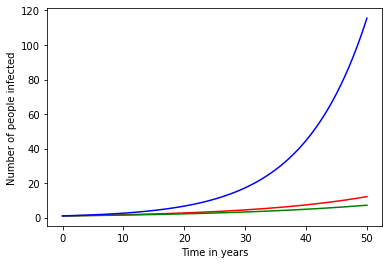

In [104]:
#EXAMPLE 1: Graph the known I(t)=I0*e^(rSt/N)
import matplotlib.pyplot as plt
import numpy as np
import math
t_points=np.arange(0,50,0.01) #time from 0-50 years in incraments of 0.01 years

def true_answer(I0,r,S,N,t_points):
    #The equation is I(t)=I0*e^(rSt/N)
    I=I0 * np.exp((r*S/N)*t_points)
    return I

N = 100 #N is the number of people, fixed at 100
I0= 1 #I0 is the initial number of infected, fixed at 1
S=1.0 #I said that everyone is 100% likely to get the disease, so S=1.0

alpha_points=true_answer(I0,5,S,N,t_points)
gamma_points=true_answer(I0,3.95,S,N,t_points)
delta_points=true_answer(I0,9.5,S,N,t_points)

plt.plot(t_points,alpha_points,'k',color='red')
plt.plot(t_points,gamma_points,'k',color='green')
plt.plot(t_points,delta_points,'k',color='blue')
plt.xlabel("Time in years")
plt.ylabel("Number of people infected")

print("This is the known I(t) solution to the basic Exponential disease Model from t=0 to t=50 years.")
print("\nThe COVID-19 Alpha Variant, first seen in November 2020, is shown red.")
print("The COVID-19 Delta Variant, firs seen in December 2020, is blue.")
print("The COVID-19 Gamma Variant, first seen in January 2021, is shown green.")

This is the calculated I(t) solution given dI/dt = rS/N * I(t)

The COVID-19 Alpha Variant, first seen in November 2020, is shown red.
The COVID-19 Delta Variant, firs seen in December 2020, is blue.
The COVID-19 Gamma Variant, first seen in January 2021, is shown green.

Look, these graphs are the same! As they should be! ;)


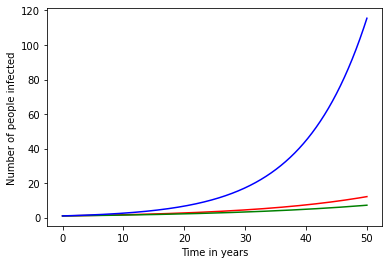

In [115]:
#EXAMPLE 2: Calculate I(t) given dI/dt = rS/N * I(t)
import matplotlib.pyplot as plt
import numpy as np
import math

#step 1 = write the diff_eq function
a=10**(-3)
t_points=np.arange(0,50,2*a) #I remember the 2*a from before

#This is my updated version of his diff function, where you can input the constants too
def model_exp(r,S,N,f):
    #The equation is dI/dt = rS/N * I(t)
    f_dot = (r*S/N)*f
    return f_dot

#This is my updated version of his Euler function, with one condensed for loop
def find_function(I0,r,S,N,t_points):
    f = np.empty(len(t_points)) #This line resets f every time find_function is called
    f[0]=I0 #the initial value
    for t in range(0,len(t_points)-1):
        f_dot = model_exp(r,S,N,f[t])
        f[t+1] = f[t]+2*a*f_dot #I remember the 2*a from before
    return f

#step 2 = calculate everything
N = 100 #N is the number of people, fixed at 100
I0= 1 #I0 is the initial number of infected, fixed at 1
S=1.0 #I said that everyone is 100% likely to get the disease, so S=1.0

red_points = find_function(I0,5,S,N,t_points)
green_points = find_function(I0,3.95,S,N,t_points)
blue_points = find_function(I0,9.5,S,N,t_points)

#step 3 = plot everything
plt.plot(t_points,red_points,'k',color='red')
plt.plot(t_points,green_points,'k',color='green')
plt.plot(t_points,blue_points,'k',color='blue')
plt.xlabel("Time in years")
plt.ylabel("Number of people infected")

print("This is the calculated I(t) solution given dI/dt = rS/N * I(t)")
print("\nThe COVID-19 Alpha Variant, first seen in November 2020, is shown red.")
print("The COVID-19 Delta Variant, firs seen in December 2020, is blue.")
print("The COVID-19 Gamma Variant, first seen in January 2021, is shown green.")
print("\nLook, these graphs are the same! As they should be! ;)")

In [22]:
##GARBAGE DUMP OF CODE
#It doesn't work, but I don't want to delete it

#Attempt 1.1: I modified the previous function for recursion
#def diff_eq_I(I0,t_points,a, r, S, N):
    #I_points=[I0]
    #for i0 in range(1,len(t_points)):
        #I_previous = I_points[-1]
        #dI = (r*S/N) * I_previous
        #I_next = I_previous + dI
        #I_points.append(I_next)
    #return I_points

#Attempt 1.0: I started with the basic previous function
#def diff_eq(g,f0,x,a):
    #Our ending goal is to export the original function: f_points
    #We are going to start with f0, the initial known value
    #f_points=[f0] 
    #Now we find the next points
    #for i0 in range(1,len(x)):
        #f_previous = f_points[-1]
        #df = g(x[i0]+a) * 2*a
        #f_next = f_previous + df
        #f_points.append(f_next)
    #return f_points